In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
from scipy.signal import butter,filtfilt, find_peaks

In [2]:
def Generate_Mohr_circle(Stress_yield, Stress_radial):
    ra = (Stress_yield-Stress_radial)/2
    ca = (Stress_yield+Stress_radial)/2
    theta = np.linspace(0,180,1000) * np.pi/180


    mohr_x = ra * np.cos(theta) + ca
    mohr_y = ra * np.sin(theta)

    return mohr_x, mohr_y

In [3]:
def mohr_coulomb(s1a, s3a, s1b, s3b):
#  Find the parameters necessary to draw the Mohr-Coulomb failure envelope
#  Idea behind function:
#        With the function we try to find the Tangent points on outside
#        of the circles. We then connect a line between the two tangent
#        points.
#        To make sure my script works, I need my "first" circle to be located
#        to the left, and the "second" circle to be located to the right.
#        This requirement is the first step in the script below. To do this,
#        we create a temporary matrix M

    M = ([(s1a-s3a)/2,(s1a+s3a)/2],
         [(s1b-s3b)/2,(s1b+s3b)/2])
    # Min_point = np.minimum(M[:1])
    Min_point = M[0]
    ca = ([Min_point[1], 0])
    ra = Min_point[0]
    # print(ca, ra)
    Max_point = M[1]
    cb = ([Max_point[1], 0])
    rb = Max_point[0]
#     print(cb, rb)

    a21 = cb[0]-ca[0]
    b21 = cb[1]-ca[1]
    d2 = a21**2 + b21**2
    r21 = (rb-ra)/d2
    # print(a21)


    s21 = np.sqrt(d2-(rb-ra)**2)/d2

    u1 = ([-a21*r21-b21*s21,-b21*r21+a21*s21]) # Left unit vector
    u2 = ([-a21*r21+b21*s21,-b21*r21-a21*s21])# Right unit vector
    # print(u1,u2)


    L1 = np.add([ca[0],ca[1]], np.multiply(ra,u1))
    L2 = np.add([cb[0],cb[1]], np.multiply(rb,u1)) # Left line tangency points
    R1 = np.add([ca[0],ca[1]], np.multiply(ra,u2))
    R2 = np.add([cb[0],cb[1]], np.multiply(rb,u2)) # Right line tangency points

    theta = np.linspace(0,180,1000)*(np.pi/180)                      # Potential range of Theta

    mohr_x1 = ra * np.cos(theta) + ca[0]
    mohr_y1 = ra * np.sin(theta) + ca[1]
   
    mohr_x2 = rb * np.cos(theta) + cb[0]
    mohr_y2 = rb * np.sin(theta) + cb[1]

    ##Now we wish to export the tangent line as Y = aX + b:
    x = [L1[0], L2[0]]
    y = [L1[1], L2[1]]
    c = np.linalg.solve(([1, x[0]],[1, x[1]]), np.transpose(y))                        # Calculate Parameter Vector
    a = c[1]
    b = c[0]
    # print(a, b)

    theta = np.pi-(np.arctan(np.absolute(u1[1])/np.absolute(u1[0])))

    return theta, a, b


In [4]:
First_var = 73.39
Second_var = 97.72
Third_var = 120.64
Fourth_var = 146.51
Fifth_var = 175.36

theta12,a12,b12 = mohr_coulomb(First_var, 10, Second_var, 20)    # First and second cycle (yield points and confining)
theta13,a13,b13 = mohr_coulomb(First_var, 10, Third_var, 30)
theta14,a14,b14 = mohr_coulomb(First_var, 10, Fourth_var, 40)
theta15,a15,b15 = mohr_coulomb(First_var, 10, Fifth_var, 50)
theta23,a23,b23 = mohr_coulomb(Second_var, 20, Third_var, 30)
theta24,a24,b24 = mohr_coulomb(Second_var, 20, Fourth_var, 40)
theta25,a25,b25 = mohr_coulomb(Second_var, 20, Fifth_var, 50)
theta34,a34,b34 = mohr_coulomb(Third_var, 30, Fourth_var, 40)
theta35,a35,b35 = mohr_coulomb(Third_var, 30, Fifth_var, 50)
theta45,a45,b45 = mohr_coulomb(Fourth_var, 40, Fifth_var, 50)

Envelope12345= [[theta12,a12,b12],
                [theta13,a13,b13],
                [theta14,a14,b14],
                [theta15,a15,b15],
                [theta23,a23,b23],
                [theta24,a24,b24],
                [theta25,a25,b25],
                [theta34,a34,b34],
                [theta35,a35,b35],
                [theta45,a45,b45]]      # Envelope of failure and the mean of all points to obtain the line
# Envelope12345=[[theta12,a12,b12],[theta13,a13,b13],[theta14,a14,b14],[theta15,a15,b15],[theta23,a23,b23],[theta24,a24,b24],[theta25,a25,b25],[theta34,a34,b34],[theta35,a35,b35],[theta45,a45,b45]]
Envelope_mean = np.mean(Envelope12345, axis=0)
print(Envelope_mean)

xrange = np.linspace(0,150)

y_123 = Envelope_mean[1]*xrange+Envelope_mean[2]     # Envelope_mean(2) = a12, Envelope_mean(3)=b12
# y_12 = a12.*xrange+b12;                               # Line with slope a12
mohr_x1,mohr_y1 = Generate_Mohr_circle(First_var, 10)       # Function that creates the Mohr circles based on the sigmas
mohr_x2,mohr_y2 = Generate_Mohr_circle(Second_var, 20)
mohr_x3,mohr_y3 = Generate_Mohr_circle(Third_var, 30)
mohr_x4,mohr_y4 = Generate_Mohr_circle(Fourth_var, 40)
mohr_x5,mohr_y5 = Generate_Mohr_circle(Fifth_var, 50)

[ 2.0180653   0.48021404 14.3885676 ]


Text(0, 0.5, '$\\tau [MPa]$')

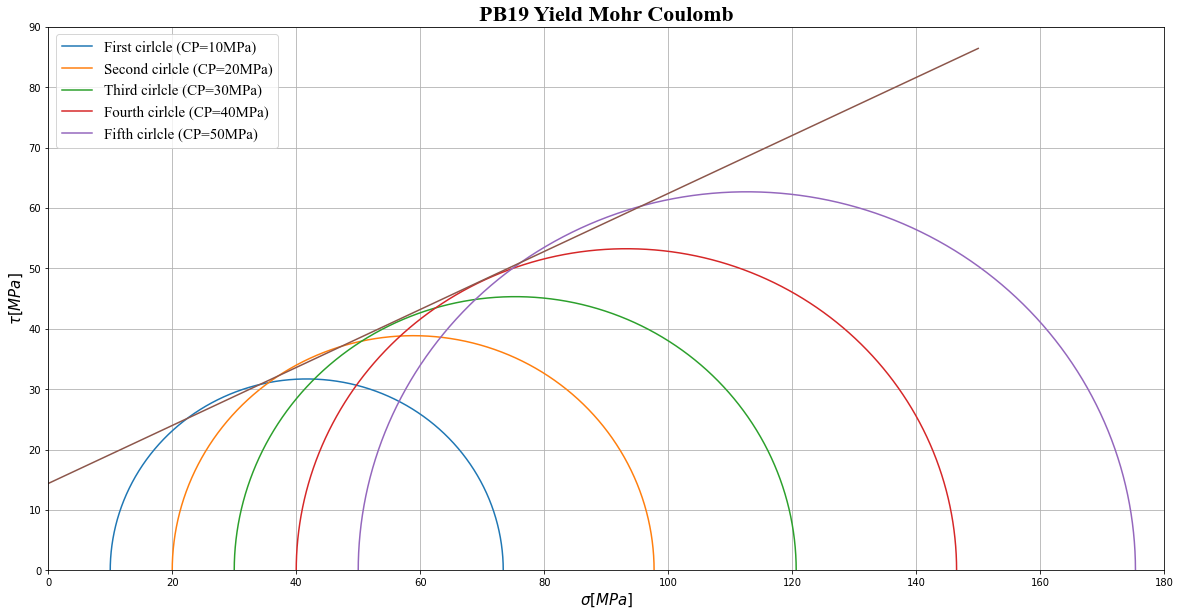

In [5]:
csfont = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15}

tfont = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}



# csfont = {'fontname':'Times New Roman'}

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(mohr_x1,mohr_y1, label='First cirlcle (CP=10MPa)')
ax.plot(mohr_x2,mohr_y2, label='Second cirlcle (CP=20MPa)')
ax.plot(mohr_x3,mohr_y3, label='Third cirlcle (CP=30MPa)')
ax.plot(mohr_x4,mohr_y4, label='Fourth cirlcle (CP=40MPa)')
ax.plot(mohr_x5,mohr_y5, label='Fifth cirlcle (CP=50MPa)')
ax.plot(xrange,y_123)
ax.grid()
ax.set_xlim(0, 180)
ax.set_ylim(0, 90)
plt.legend(loc='upper left', prop=csfont)
plt.title('PB19 Yield Mohr Coulomb',**tfont)
plt.xlabel(r'$\sigma [MPa]$', **csfont)
plt.ylabel(r'$\tau [MPa]$', **csfont)

Stress path

31.13 45.906666666666666 60.21333333333333 75.50333333333333 91.78666666666668
31.695 38.86 45.32 53.254999999999995 62.68000000000001
0.5073575752765176


Text(0, 0.5, 'q')

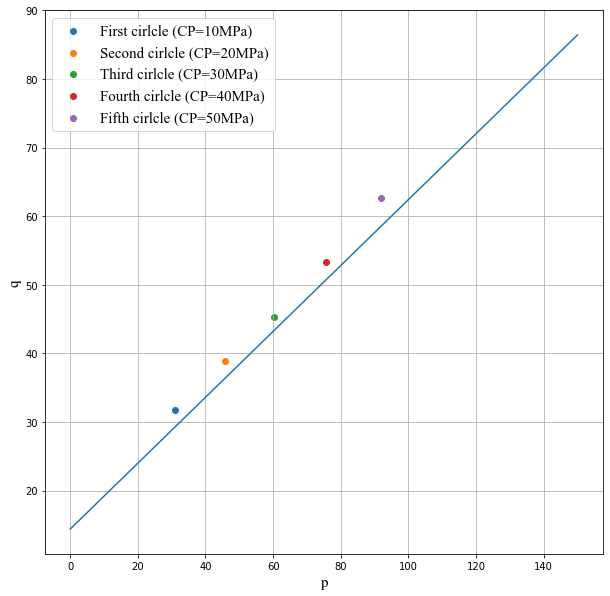

In [16]:
## First calculate p and q
## p is the average of the effective stresses
from numpy import arctan


p1 = (First_var + 2*10)/3
p2 = (Second_var + 2*20)/3
p3 = (Third_var + 2*30)/3
p4 = (Fourth_var + 2*40)/3
p5 = (Fifth_var + 2*50)/3
print(p1, p2, p3, p4, p5)

## q quantifies shear stress 
q1 = (First_var - 10)/2
q2 = (Second_var - 20)/2
q3 = (Third_var - 30)/2
q4 = (Fourth_var - 40)/2
q5 = (Fifth_var - 50)/2
print(q1, q2, q3, q4, q5)

m = 14.39
tanalpha = (q1-m)/p1
alpha = np.arctan(tanalpha)
print(alpha)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(p1,q1, label='First cirlcle (CP=10MPa)')
ax.scatter(p2,q2, label='Second cirlcle (CP=20MPa)')
ax.scatter(p3,q3, label='Third cirlcle (CP=30MPa)')
ax.scatter(p4,q4, label='Fourth cirlcle (CP=40MPa)')
ax.scatter(p5,q5, label='Fifth cirlcle (CP=50MPa)')
ax.plot(xrange,y_123)
ax.grid()
# ax.set_xlim(-0.1, 0.1)
# ax.set_ylim(14, 15)
plt.legend(loc='upper left', prop=csfont)
# plt.title('PB19 Yield Mohr Coulomb',**tfont)
plt.xlabel('p', **csfont)
plt.ylabel('q', **csfont)

In [ ]:
from math import atan, cos, sin, pi
 
# Function to find the
# angle between two lines
def findAngle(M1, M2):
    PI = 3.14159265
     
    # Store the tan value  of the angle
    angle = abs((M2 - M1) / (1 + M1 * M2))
 
    # Calculate tan inverse of the angle
    ret = atan(angle)
 
    # Convert the angle from
    # radian to degree
    val = (ret * 180) / PI
 
    # Print the result
    print (round(val, 4))
 
# Driver Code
if __name__ == '__main__':
    M1 = Envelope_mean[0]
    M2 = 0
 
    phiangle = findAngle(M1, M2)

phi = 63.6405
print(phi)

# Epsilon = (pi/2)-(phi/2)
# print(Epsilon)
    # This code is contributed by mohit kumar 29.

In [ ]:
s1 = 0.5*(First_var-10)
s2 = 0.5*(Second_var-20)
s3 = 0.5*(Third_var-30)
s4 = 0.5*(Fourth_var-40)
s5 = 0.5*(Fifth_var-50)
print(s1, s2, s3, s4, s5)

sig1 = 0.5*(First_var+10)
sig2 = 0.5*(Second_var+20)
sig3 = 0.5*(Third_var+30)
sig4 = 0.5*(Fourth_var+40)
sig5 = 0.5*(Fifth_var+50)
print(sig1, sig2, sig3, sig4, sig5)


tau1 = s1*cos(phi)
tau2 = s2*cos(phi)
tau3 = s3*cos(phi)
tau4 = s4*cos(phi)
tau5 = s5*cos(phi)
print(tau1, tau2, tau3, tau4, tau5)

sigma1 = sig1 + s1*sin(phi)
sigma2 = sig2 + s2*sin(phi)
sigma3 = sig3 + s3*sin(phi)
sigma4 = sig4 + s4*sin(phi)
sigma5 = sig5 + s5*sin(phi)
print(sigma1, sigma2, sigma3, sigma4, sigma5)




In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.scatter(sigma1, tau1, label='First cirlcle (CP=10MPa)')
ax1.scatter(sigma2, tau2, label='Second cirlcle (CP=20MPa)')
ax1.scatter(sigma3, tau3, label='Third cirlcle (CP=30MPa)')
ax1.scatter(sigma4, tau4, label='Fourth cirlcle (CP=40MPa)')
ax1.scatter(sigma5, tau5, label='Fifth cirlcle (CP=50MPa)')
ax1.plot(xrange,y_123)
ax1.grid()
# ax1.set_xlim(0, 180)
# ax1.set_ylim(0, 90)
plt.legend(loc='upper left', prop=csfont)
plt.title('PB19 Yield Mohr Coulomb',**tfont)
plt.xlabel(r'$\sigma [MPa]$', **csfont)
plt.ylabel(r'$\tau [MPa]$', **csfont)